In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [38]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [39]:
folders = ['bottom_left', 'bottom_right', 'bottom_middle', 'top_left', 'top_right', 'top_middle', 'left_middle', 'right_middle','middle']

In [40]:
os.listdir('bottom_left')

['frame_1.jpg',
 'frame_10.jpg',
 'frame_100.jpg',
 'frame_101.jpg',
 'frame_102.jpg',
 'frame_103.jpg',
 'frame_104.jpg',
 'frame_105.jpg',
 'frame_106.jpg',
 'frame_107.jpg',
 'frame_108.jpg',
 'frame_109.jpg',
 'frame_11.jpg',
 'frame_110.jpg',
 'frame_111.jpg',
 'frame_112.jpg',
 'frame_113.jpg',
 'frame_114.jpg',
 'frame_115.jpg',
 'frame_116.jpg',
 'frame_117.jpg',
 'frame_118.jpg',
 'frame_119.jpg',
 'frame_12.jpg',
 'frame_120.jpg',
 'frame_121.jpg',
 'frame_122.jpg',
 'frame_123.jpg',
 'frame_124.jpg',
 'frame_125.jpg',
 'frame_126.jpg',
 'frame_127.jpg',
 'frame_128.jpg',
 'frame_129.jpg',
 'frame_13.jpg',
 'frame_130.jpg',
 'frame_131.jpg',
 'frame_132.jpg',
 'frame_133.jpg',
 'frame_134.jpg',
 'frame_135.jpg',
 'frame_136.jpg',
 'frame_137.jpg',
 'frame_138.jpg',
 'frame_139.jpg',
 'frame_14.jpg',
 'frame_140.jpg',
 'frame_141.jpg',
 'frame_142.jpg',
 'frame_143.jpg',
 'frame_144.jpg',
 'frame_145.jpg',
 'frame_146.jpg',
 'frame_147.jpg',
 'frame_148.jpg',
 'frame_149.jpg',

In [41]:
import cv2

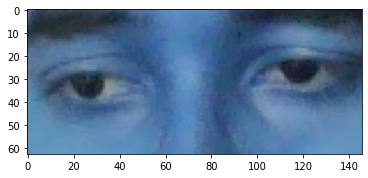

In [42]:
img = cv2.imread(f'bottom_left/{os.listdir("bottom_left")[0]}')
plt.imshow(img)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Processing 
Resize the image 
convert the image to numpy array

In [44]:
list1 = []
data = []
augmented_data = []
augmented_data_labels = []

# Iterate over the folders and load the images
for i, folder in enumerate(folders):
    for files in os.listdir(folder):
        img = cv2.imread(f'{folder}/{files}')
        img = cv2.resize(img, (250, 50))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data.append(img)
        list1.append(i)

        # # Apply data augmentation
        # img_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
        #                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
        # augmented_images = img_generator.flow(np.expand_dims(img, axis=0), batch_size=1)

        # # Save the augmented images
        # for j in range(5):  # Generate 5 augmented images per original image
        #     augmented_img = augmented_images.next()[0].astype(np.uint8)
        #     augmented_data.append(augmented_img)
        #     augmented_data_labels.append(i)

In [45]:
# plt.imshow(augmented_data[])

In [46]:
len(data), len(augmented_data)

(5016, 0)

In [47]:
type(data)

list

In [48]:
# add augmented_data_label to list1
list1.extend(augmented_data_labels)
len(list1), list1


(5016,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [49]:
data.extend(augmented_data)

In [50]:
len(data)

5016

In [51]:
list1 = np.array(list1)
list1

array([0, 0, 0, ..., 8, 8, 8])

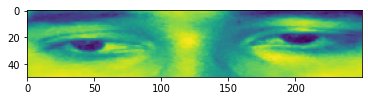

In [52]:
plt.imshow(data[0])

In [53]:
len(data), len(list1)

(5016, 5016)

In [54]:
list1

array([0, 0, 0, ..., 8, 8, 8])

# convert the image list to numpy array

In [55]:
data = np.array(data)

In [56]:
data.shape

(5016, 50, 250)

In [57]:
data = data.astype('float32')
data = data/255

In [58]:
data

array([[[0.46666667, 0.46666667, 0.45882353, ..., 0.13333334,
         0.12941177, 0.12941177],
        [0.4509804 , 0.42745098, 0.3882353 , ..., 0.13333334,
         0.13333334, 0.12941177],
        [0.41960785, 0.3882353 , 0.34117648, ..., 0.13333334,
         0.12941177, 0.1254902 ],
        ...,
        [0.5921569 , 0.5921569 , 0.59607846, ..., 0.60784316,
         0.60784316, 0.60784316],
        [0.5882353 , 0.5921569 , 0.59607846, ..., 0.6039216 ,
         0.6039216 , 0.6039216 ],
        [0.5921569 , 0.5921569 , 0.59607846, ..., 0.59607846,
         0.6       , 0.59607846]],

       [[0.41960785, 0.38431373, 0.3254902 , ..., 0.1254902 ,
         0.12941177, 0.12941177],
        [0.32156864, 0.29803923, 0.25490198, ..., 0.1254902 ,
         0.1254902 , 0.1254902 ],
        [0.24313726, 0.23921569, 0.23137255, ..., 0.12156863,
         0.12156863, 0.1254902 ],
        ...,
        [0.5647059 , 0.5647059 , 0.56078434, ..., 0.5686275 ,
         0.5686275 , 0.5686275 ],
        [0.5

In [59]:
# import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, list1, test_size=0.2, random_state=42)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4012, 50, 250), (1004, 50, 250), (4012,), (1004,))

# Building the convolution Neural Network(CNN)

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
num_class = len(folders)
num_class

9

In [63]:
x_train.shape[1:]

(50, 250)

In [64]:
model = keras.Sequential()
# Adding the first CNN layers
# input shape= (height, width, 1)
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50, 250, 1)))
# Adding the second layer with maxpooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


# Adding the third layer
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Adding the fourth layer with maxpooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Adding the flatten layer
model.add(keras.layers.Flatten())
# Adding the first dense layer
# units = 128 is the number of neurons
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))



model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))


# Add the second dense layer (output layer)
model.add(keras.layers.Dense(units=num_class, activation='softmax'))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 248, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 124, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 122, 64)       18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 42944)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

# Training the CNN

In [66]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
x_train.shape

(4012, 50, 250)

In [68]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [69]:
x_train.shape

(4012, 50, 250, 1)

In [70]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


126/126 [==============================] - 52s 401ms/step - loss: 1.9526 - accuracy: 0.2415 - val_loss: 1.1137 - val_accuracy: 0.6972
Epoch 2/10
126/126 [==============================] - 48s 377ms/step - loss: 1.0459 - accuracy: 0.6002 - val_loss: 0.3107 - val_accuracy: 0.9442
Epoch 3/10
126/126 [==============================] - 46s 362ms/step - loss: 0.6025 - accuracy: 0.7854 - val_loss: 0.1106 - val_accuracy: 0.9871
Epoch 4/10
126/126 [==============================] - 46s 365ms/step - loss: 0.4183 - accuracy: 0.8569 - val_loss: 0.0978 - val_accuracy: 0.9731
Epoch 5/10
126/126 [==============================] - 47s 372ms/step - loss: 0.3245 - accuracy: 0.8851 - val_loss: 0.0425 - val_accuracy: 0.9940
Epoch 6/10
126/126 [==============================] - 46s 364ms/step - loss: 0.2841 - accuracy: 0.9020 - val_loss: 0.0352 - val_accuracy: 0.9950
Epoch 7/10
126/126 [==============================] - 49s 388ms/step - loss: 0.2308 - accuracy: 0.9185 - val_loss: 0.0323 - val_accuracy: 0.9

In [71]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

32/32 [==============================] - 2s 71ms/step - loss: 0.0166 - accuracy: 0.9940


In [72]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred, y_test

32/32 [==============================] - 3s 73ms/step


(array([4, 5, 5, ..., 0, 5, 7], dtype=int64), array([4, 5, 5, ..., 0, 5, 7]))

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [74]:
cm, acc

(array([[112,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 106,   0,   0,   0,   0,   0,   0,   0],
        [  0,   3, 119,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 120,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 114,   0,   0,   0,   0],
        [  0,   0,   0,   0,   2, 107,   1,   0,   0],
        [  0,   0,   0,   0,   0,   0, 116,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  98,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 106]], dtype=int64),
 0.9940239043824701)

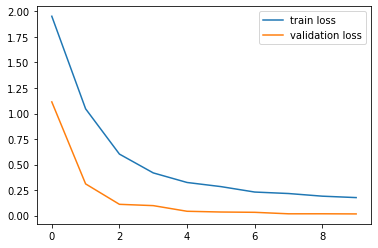

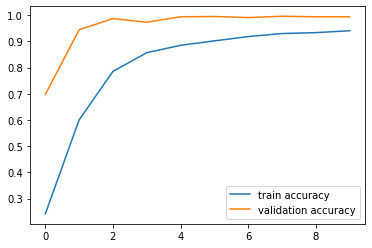

In [75]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [76]:
model.save('babal.h5')

In [77]:
# import cv2
# import numpy as np

# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Load your pre-trained CNN model
# def detect_eyes(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
#     return eyes

# def estimate_gaze(eyes, image):
#     height, width, _ = image.shape
#     eye_centers = []
#     eye_coordinates = []
#     for (x, y, w, h) in eyes:
#         center_x = x + w // 2
#         center_y = y + h // 2
#         eye_centers.append((center_x, center_y))

#         # Draw bounding boxes around the eyes
#         cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         cv2.circle(image, (center_x, center_y), 2, (0, 0, 255), 2)
#     return eyes

# # Define the desired dimensions
# desired_width = 250
# desired_height = 50

# # Initialize the webcam
# video_capture = cv2.VideoCapture(0)  # 0 represents the default webcam device

# while True:
#     # Capture frame-by-frame from the webcam
#     ret, frame = video_capture.read()
#     eyes = detect_eyes(frame)
#     eye_y = eyes[0][1]
#     eye_x = eyes[0][0]
#     eye_height = eyes[1][1]+eyes[1][3] - eyes[0][1]
#     eye_width = eyes[1][0]+eyes[1][2] - eyes[0][0]

    

#     # Flip the frame horizontally
#     # frame = cv2.flip(frame, 1)

#     # Define the ROI coordinates for the ye portion
    

#     # Extract the eye ROI from the frame
#     eye_roi = frame[eye_y:eye_y+eye_height, eye_x:eye_x+eye_width]

#     # Resize the ROI to match the desired dimensions
#     resized_roi = cv2.resize(eye_roi, (desired_width, desired_height))

#     # Convert the ROI to RGB format
#     resized_roi = cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB)

#     # Convert the ROI to numpy array
#     resized_roi = np.asarray(resized_roi)

#     # Expand dimensions to match the input shape of your CNN model
#     resized_roi = np.expand_dims(resized_roi, axis=0)

#     # Normalize pixel values
#     resized_roi = resized_roi / 255.0

#     # Pass the preprocessed ROI through your CNN model for prediction
#     predictions = model.predict(resized_roi)
#     predicted_class = np.argmax(predictions, axis=1)
#     frame = estimate_gaze(eyes, frame)

#     # Display the predicted class
#     if predicted_class[0] == 1:
#         print(folders[predicted_class[0]])
#     # Display the frame with overlays or visual indicators of person detection
#     cv2.imshow('Eye Detection', frame)

#     # Break the loop if 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close the windows
# video_capture.release()
# cv2.destroyAllWindows()
